In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from MemSE.train_test_loop import test, test_mse_th, test_mse_sim
from MemSE.model_load import load_memristor, find_existing
from MemSE.dataset import get_dataloader

device = torch.device('cpu')
print(device)

bs = 4
nb_batch = 100 / bs
train_loader, valid_loader, test_loader, nclasses, input_shape = get_dataloader('CIFAR10', bs=bs)
criterion = nn.CrossEntropyLoss().to(device)
batch = next(iter(test_loader))
batch_input = batch[0]

models_names = ['smallest_vgg', 'really_small_vgg']

N = 128

memse = load_memristor(models_names[0], nclasses, 'all', device, input_shape, 0.01, N, gmax=2.)
memse.quant(c_one=True)

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.
cpu
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Loading model checkpoint


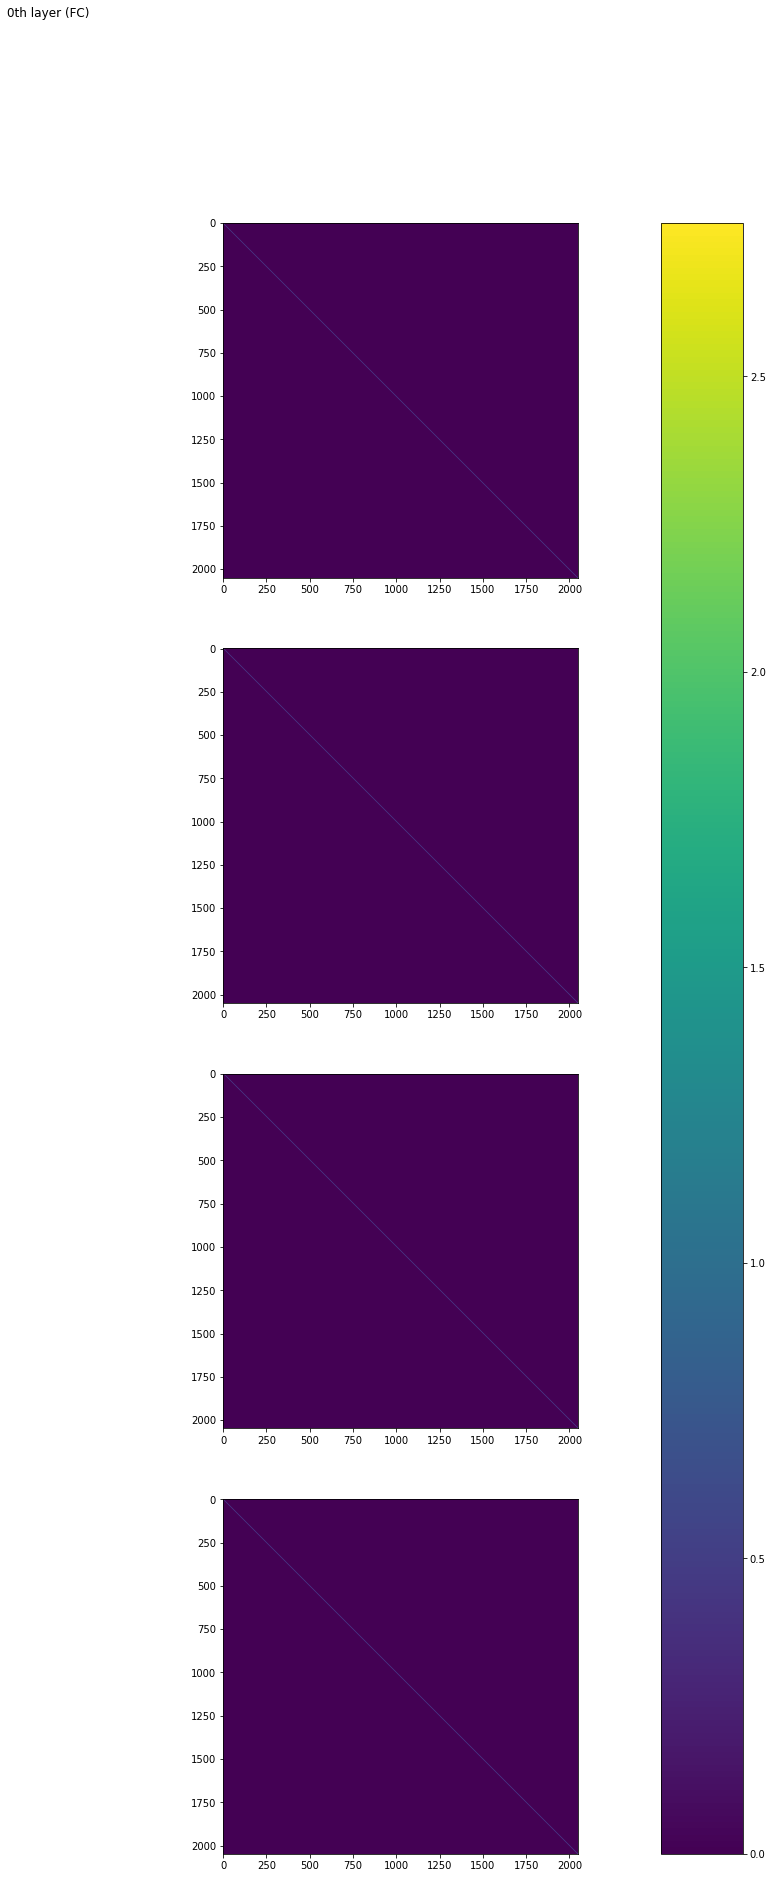

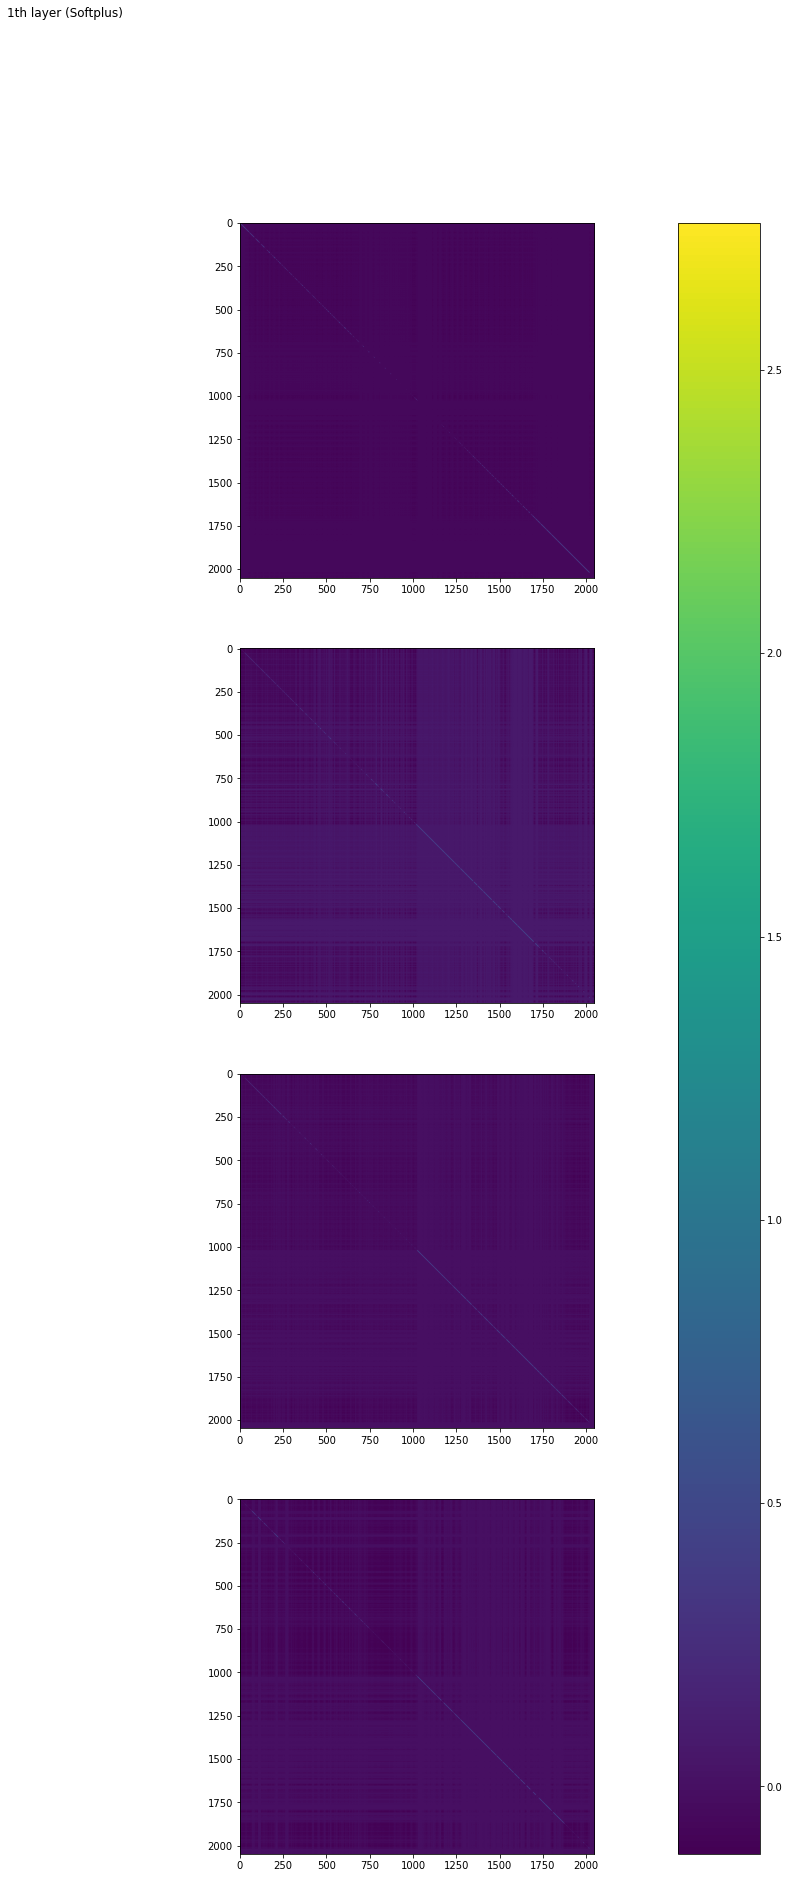

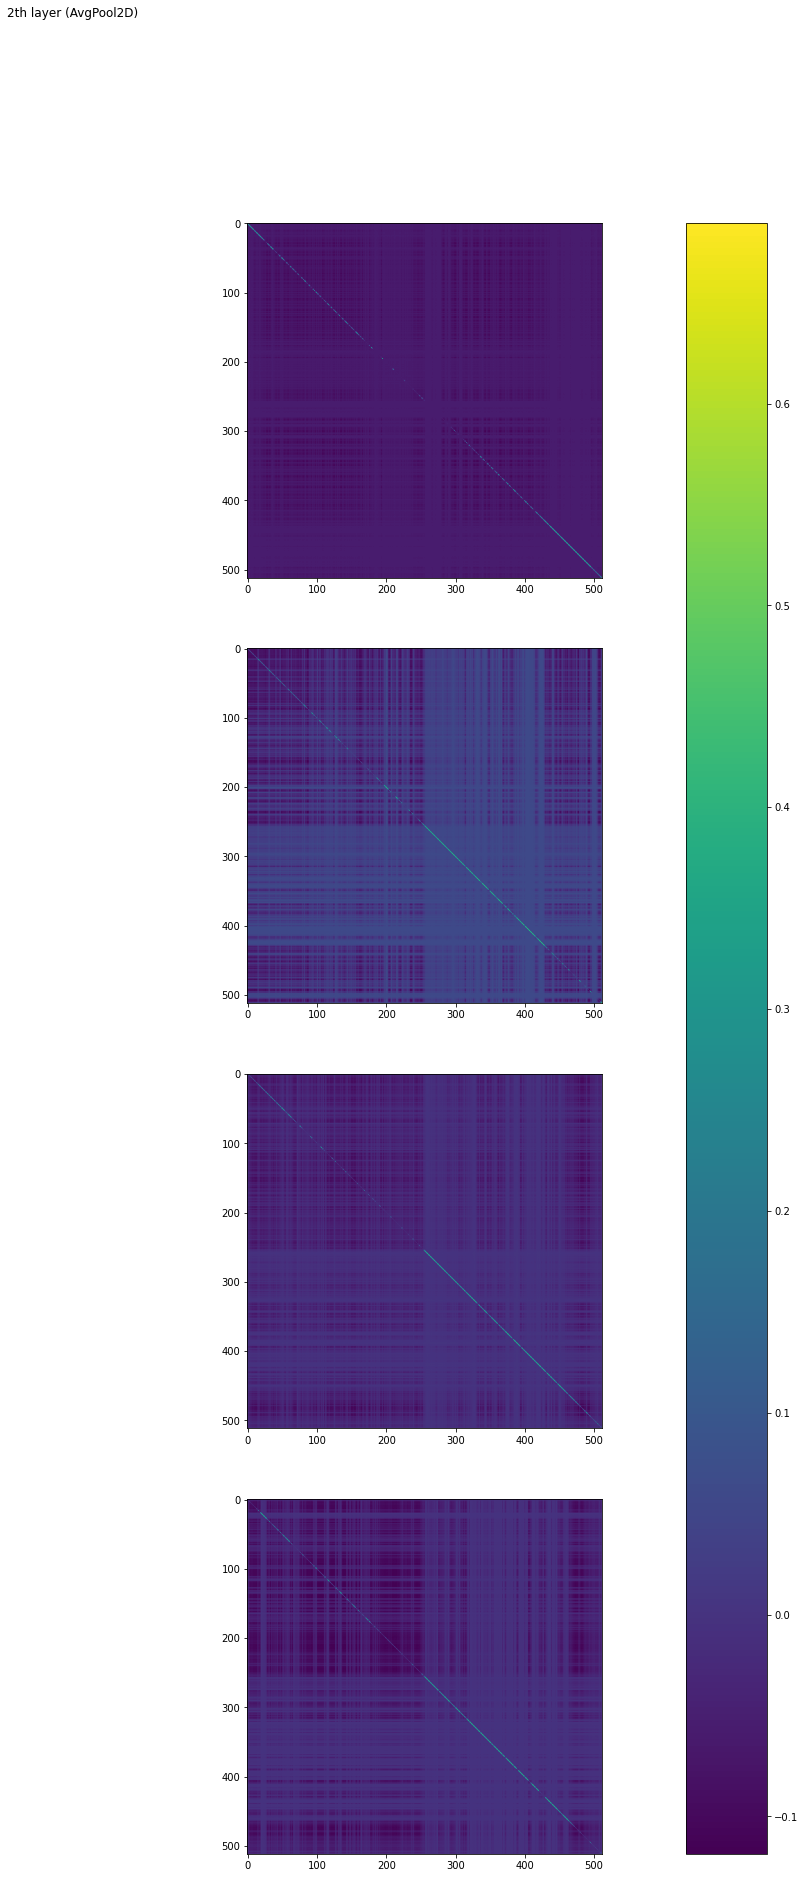

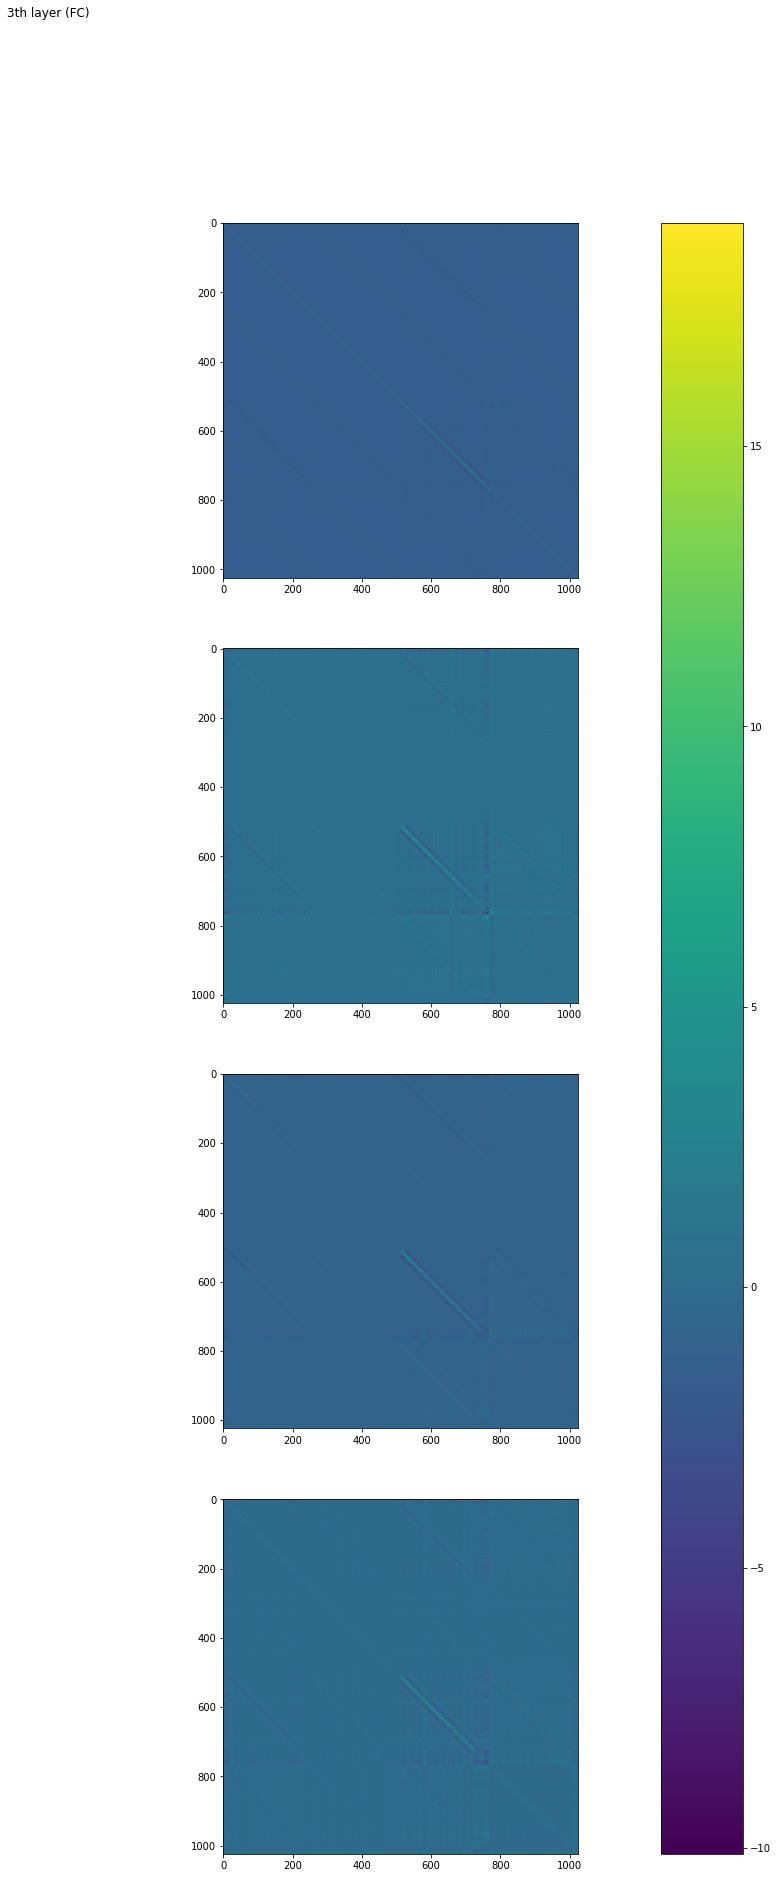

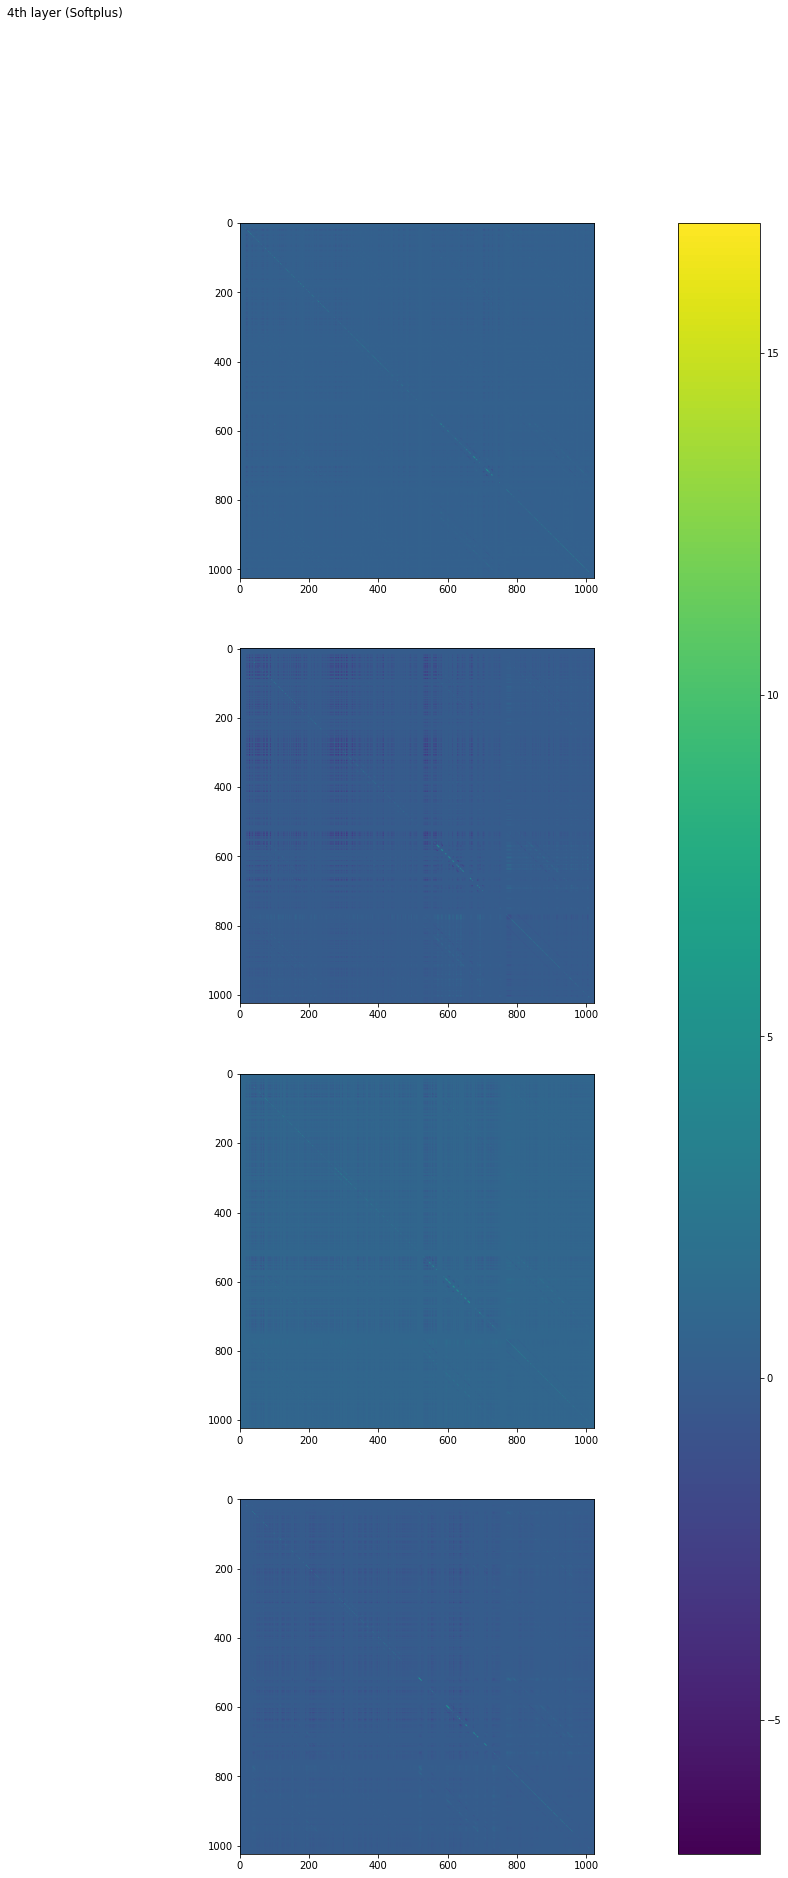

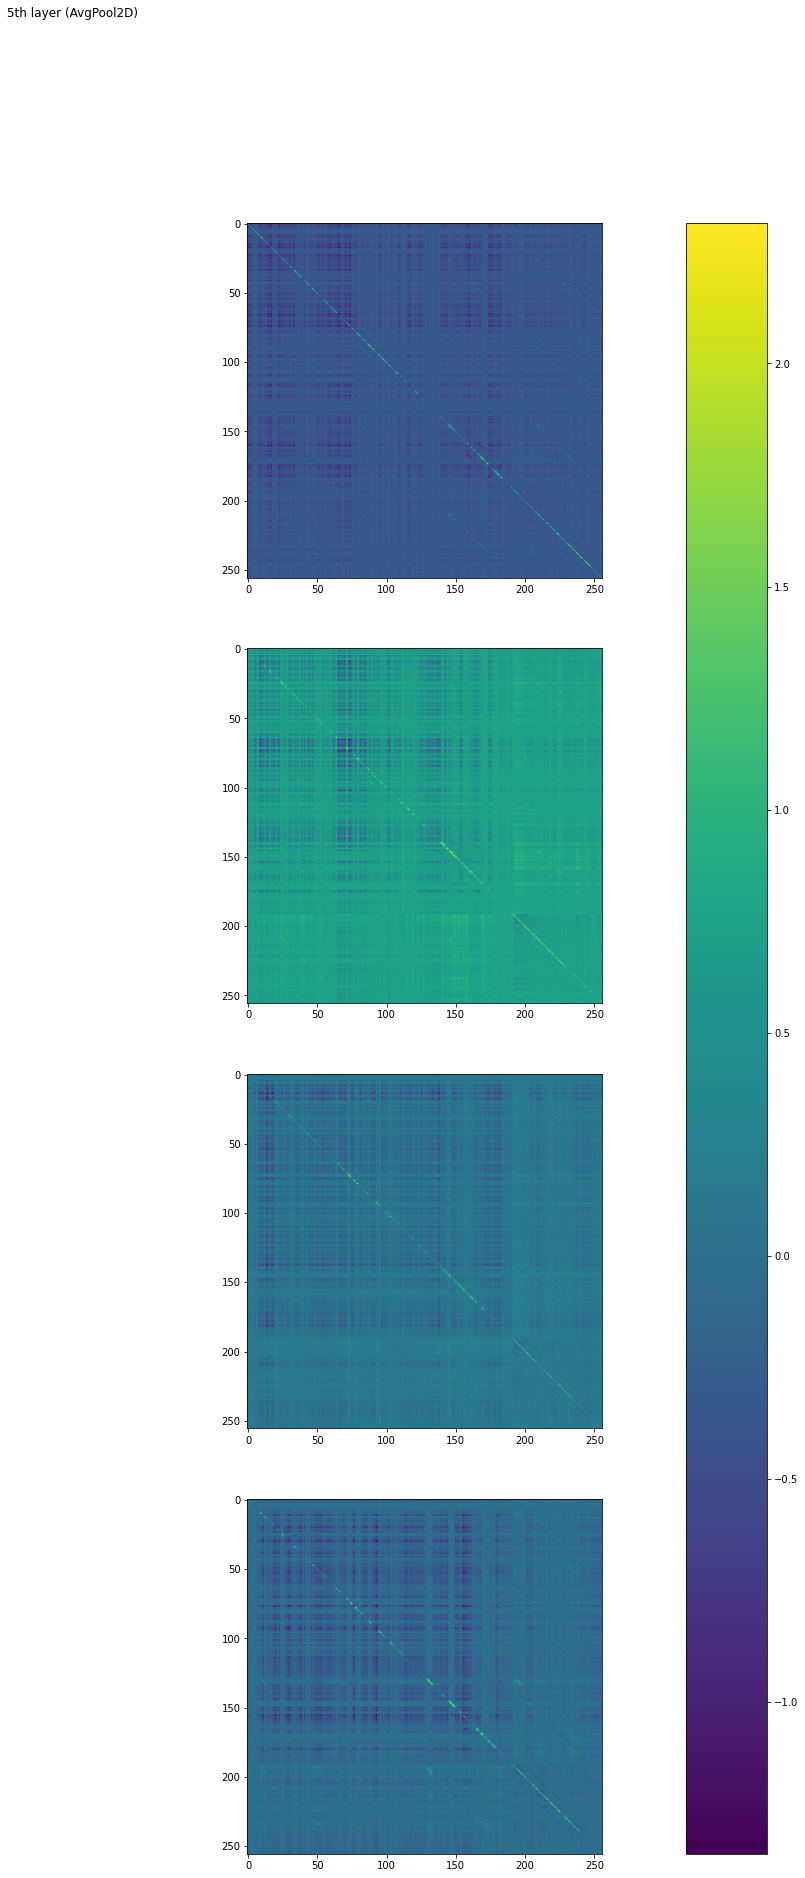

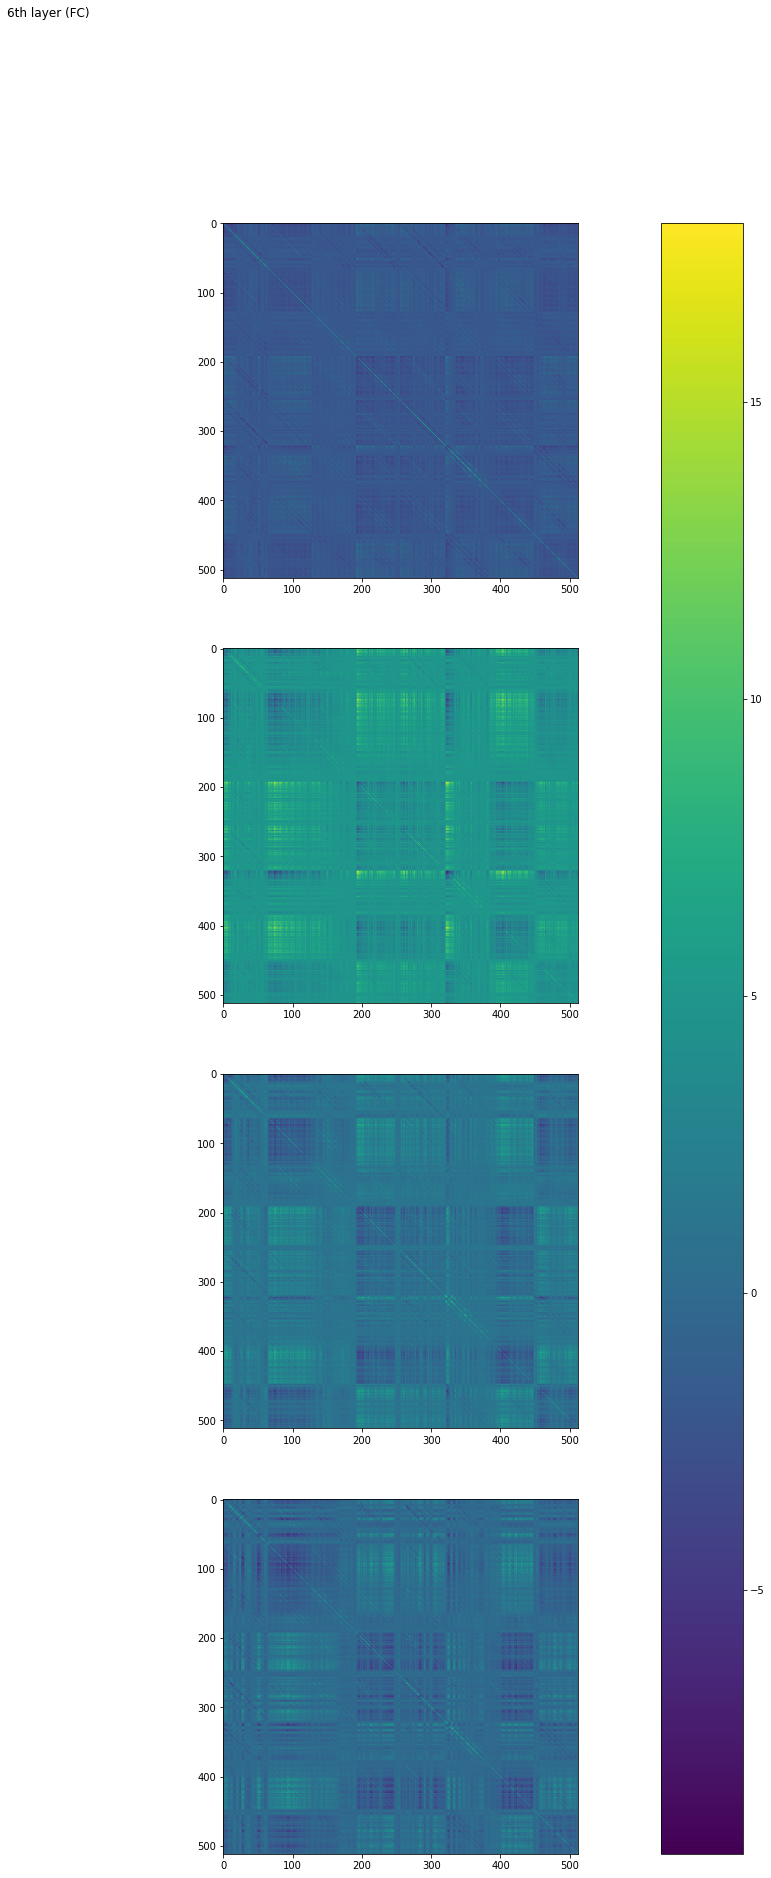

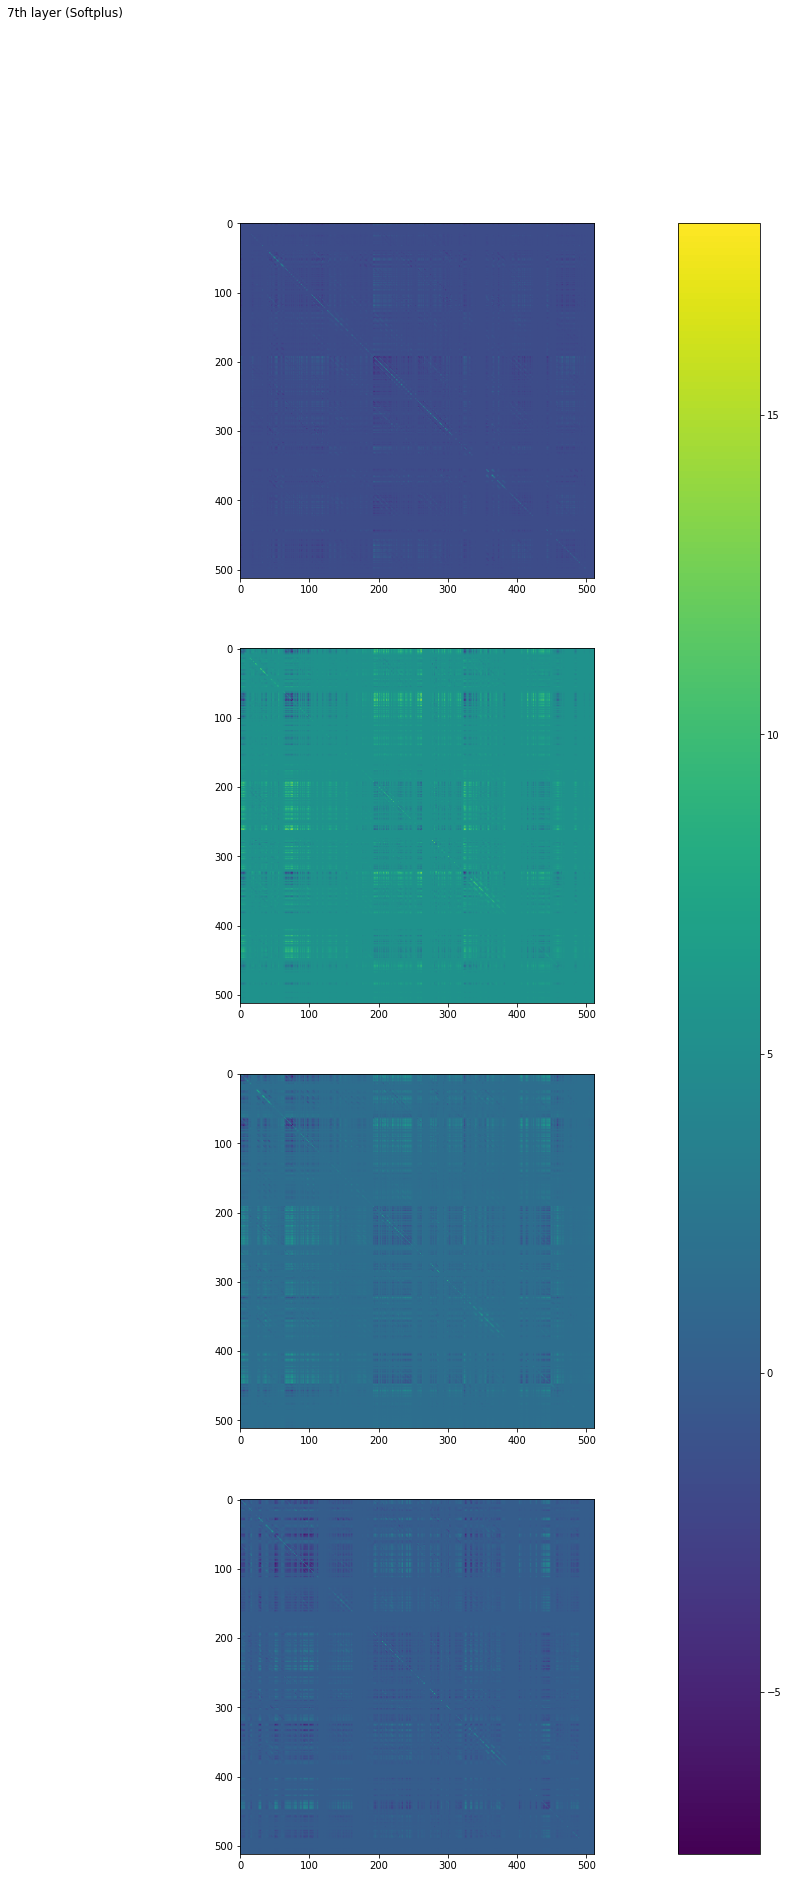

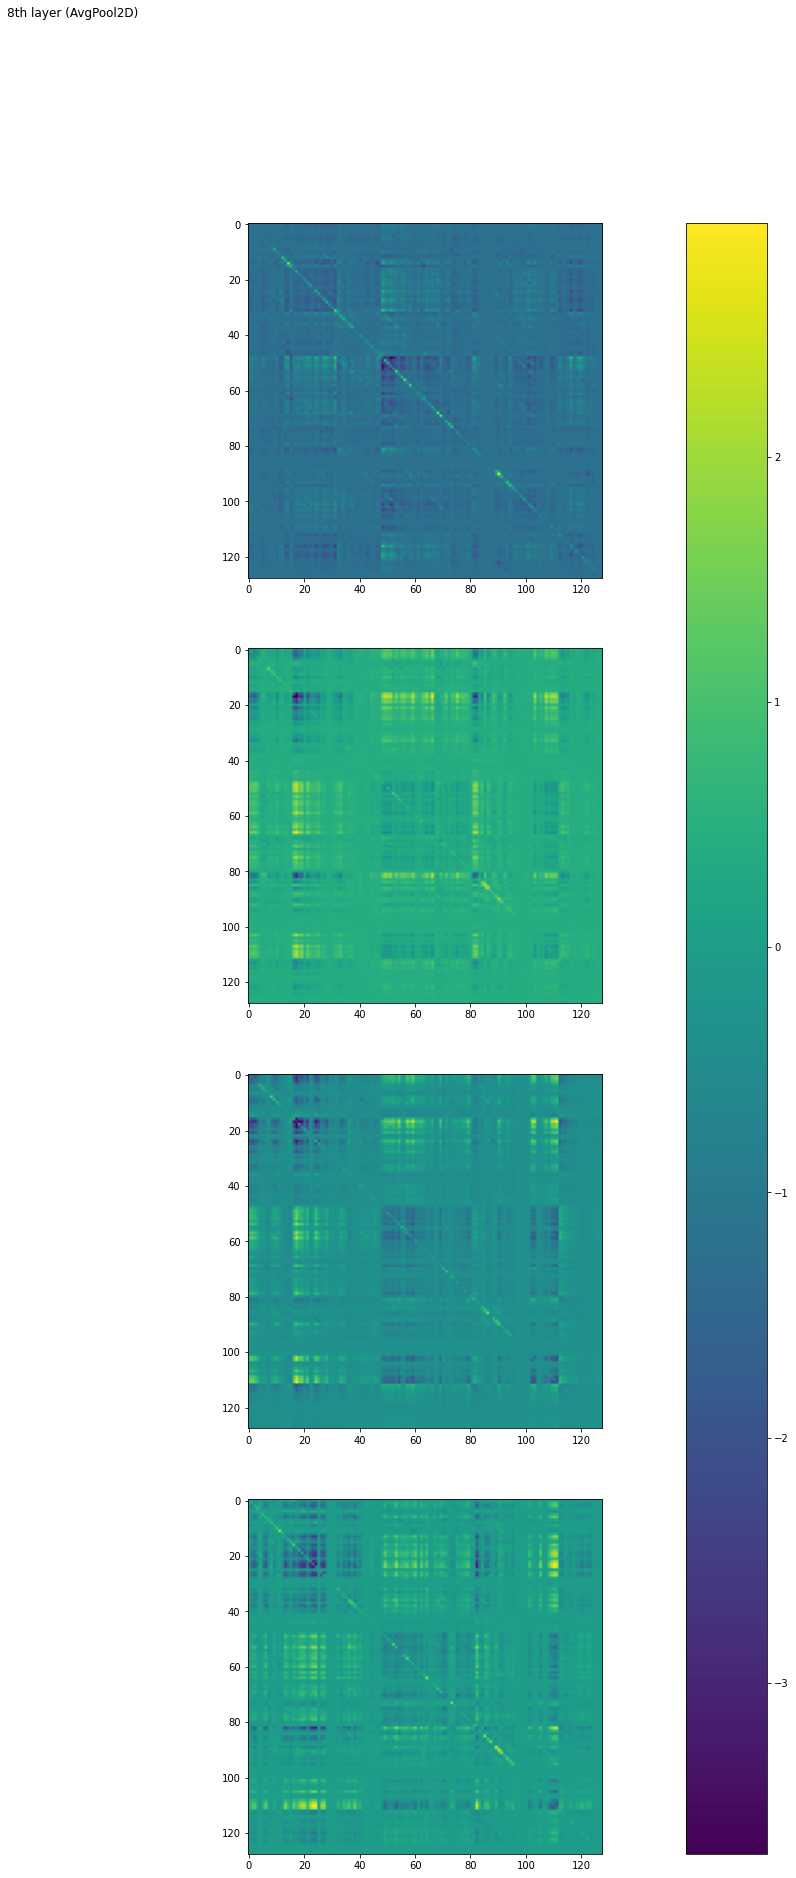

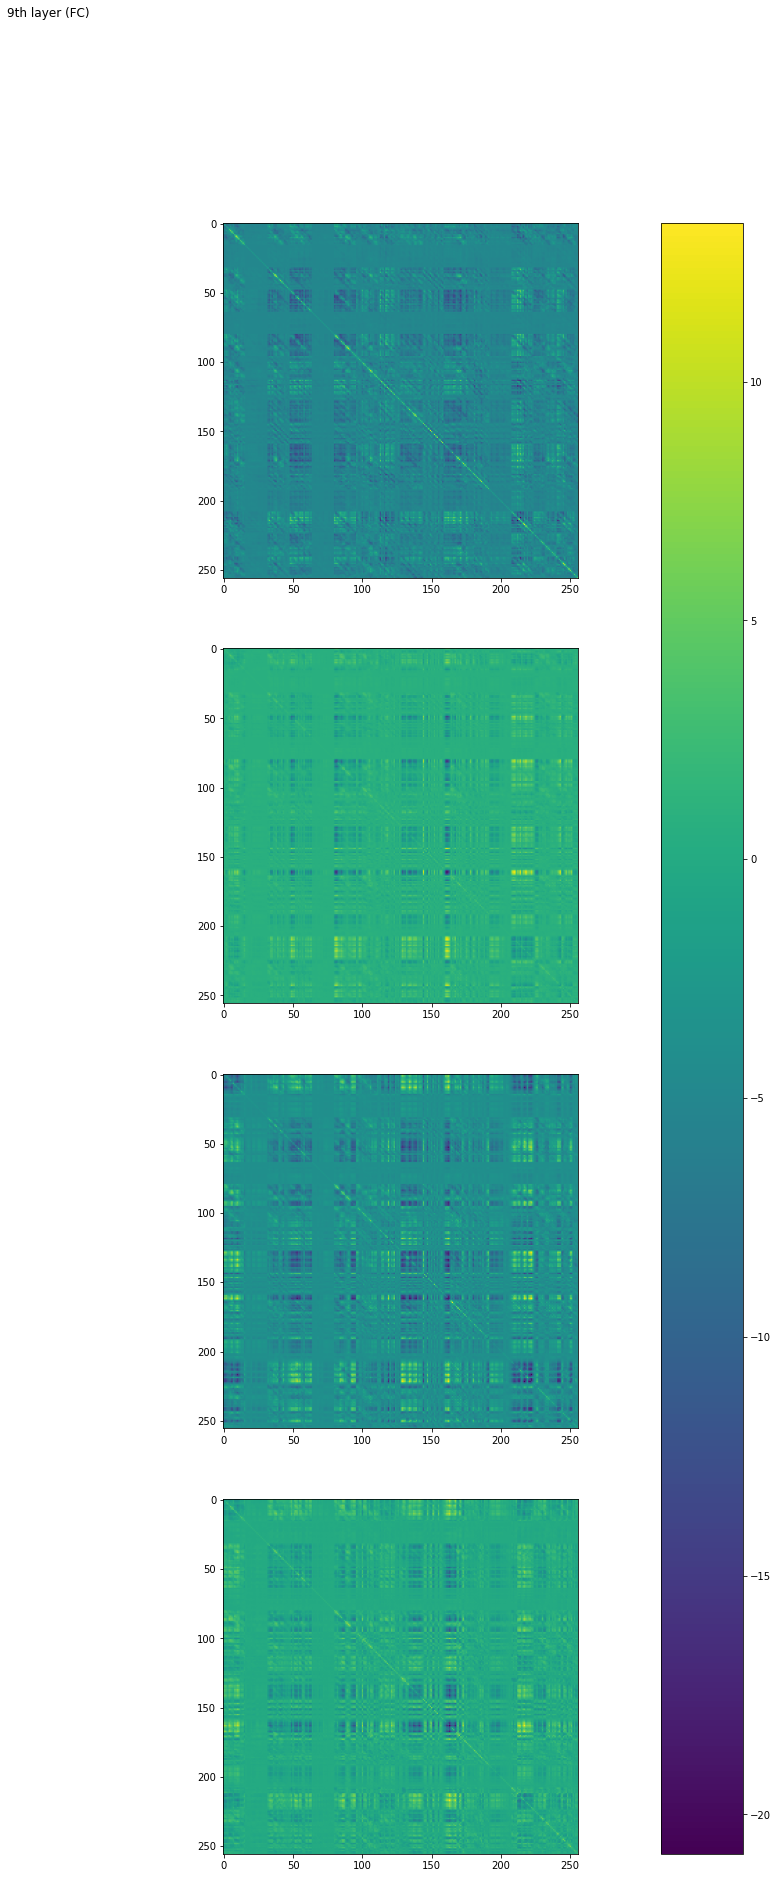

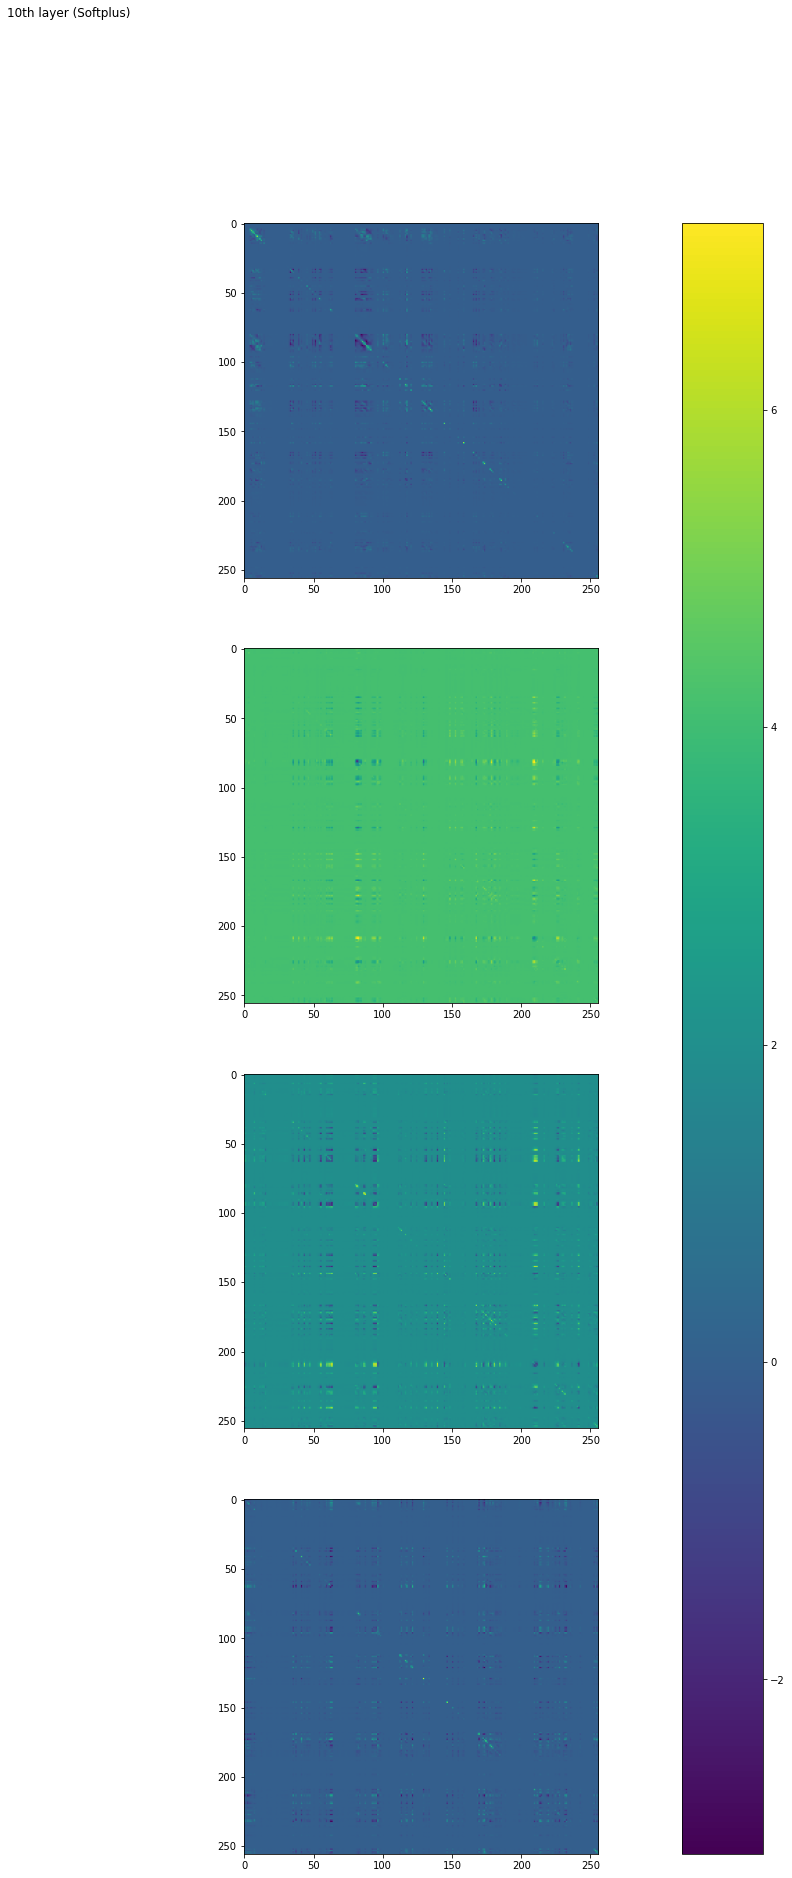

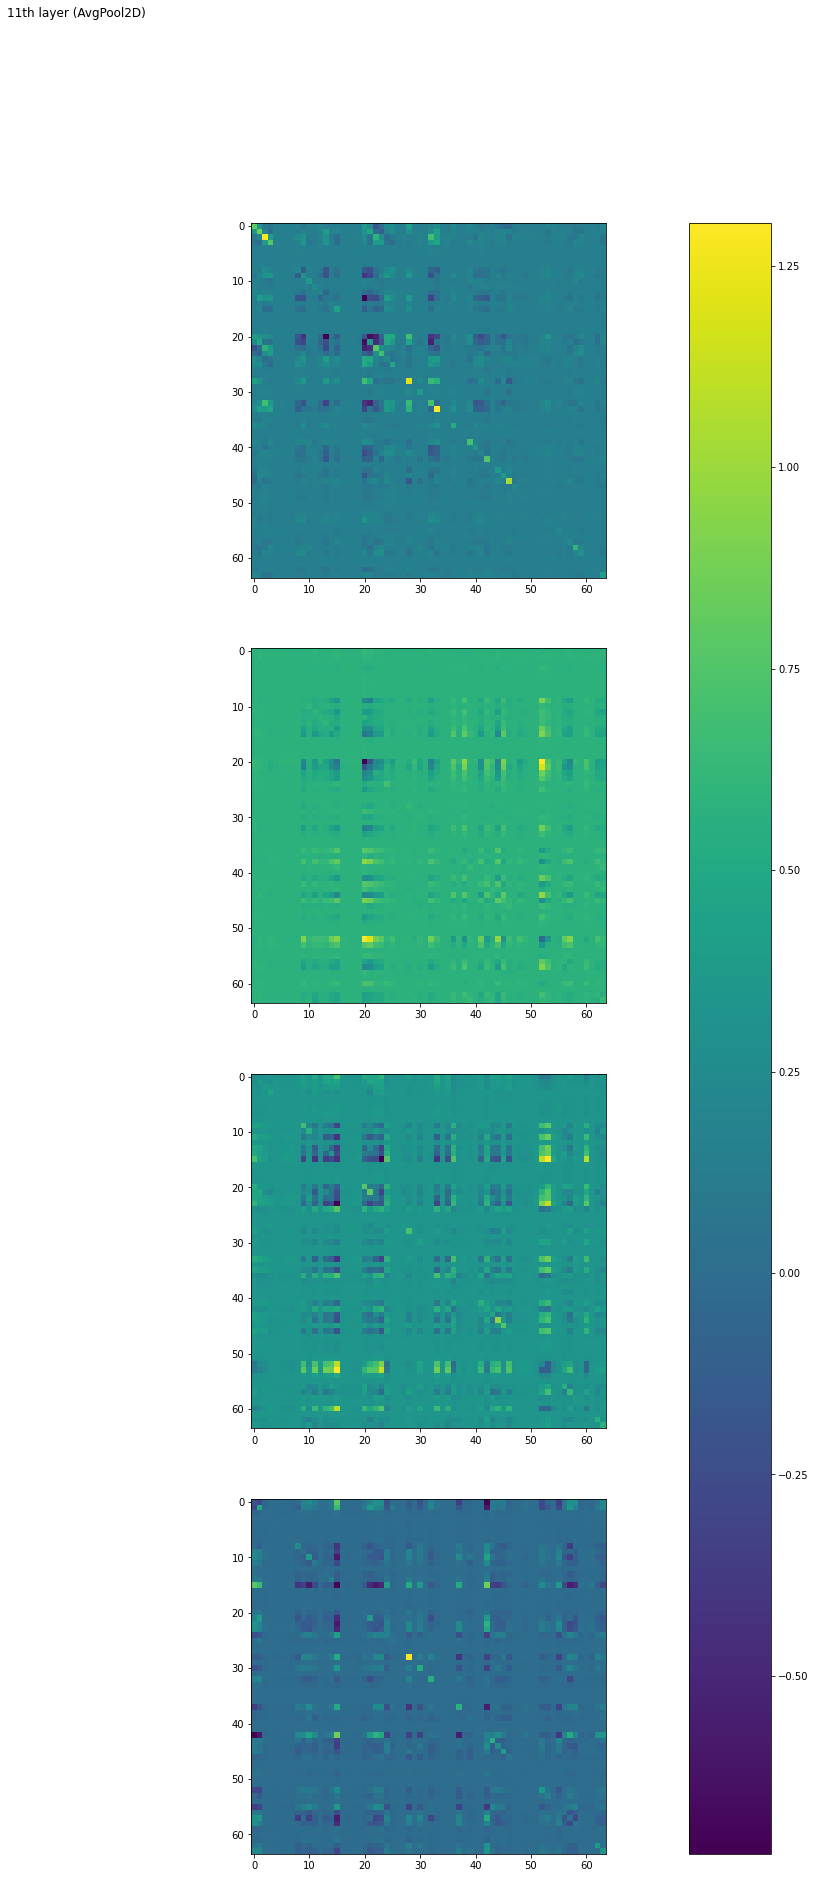

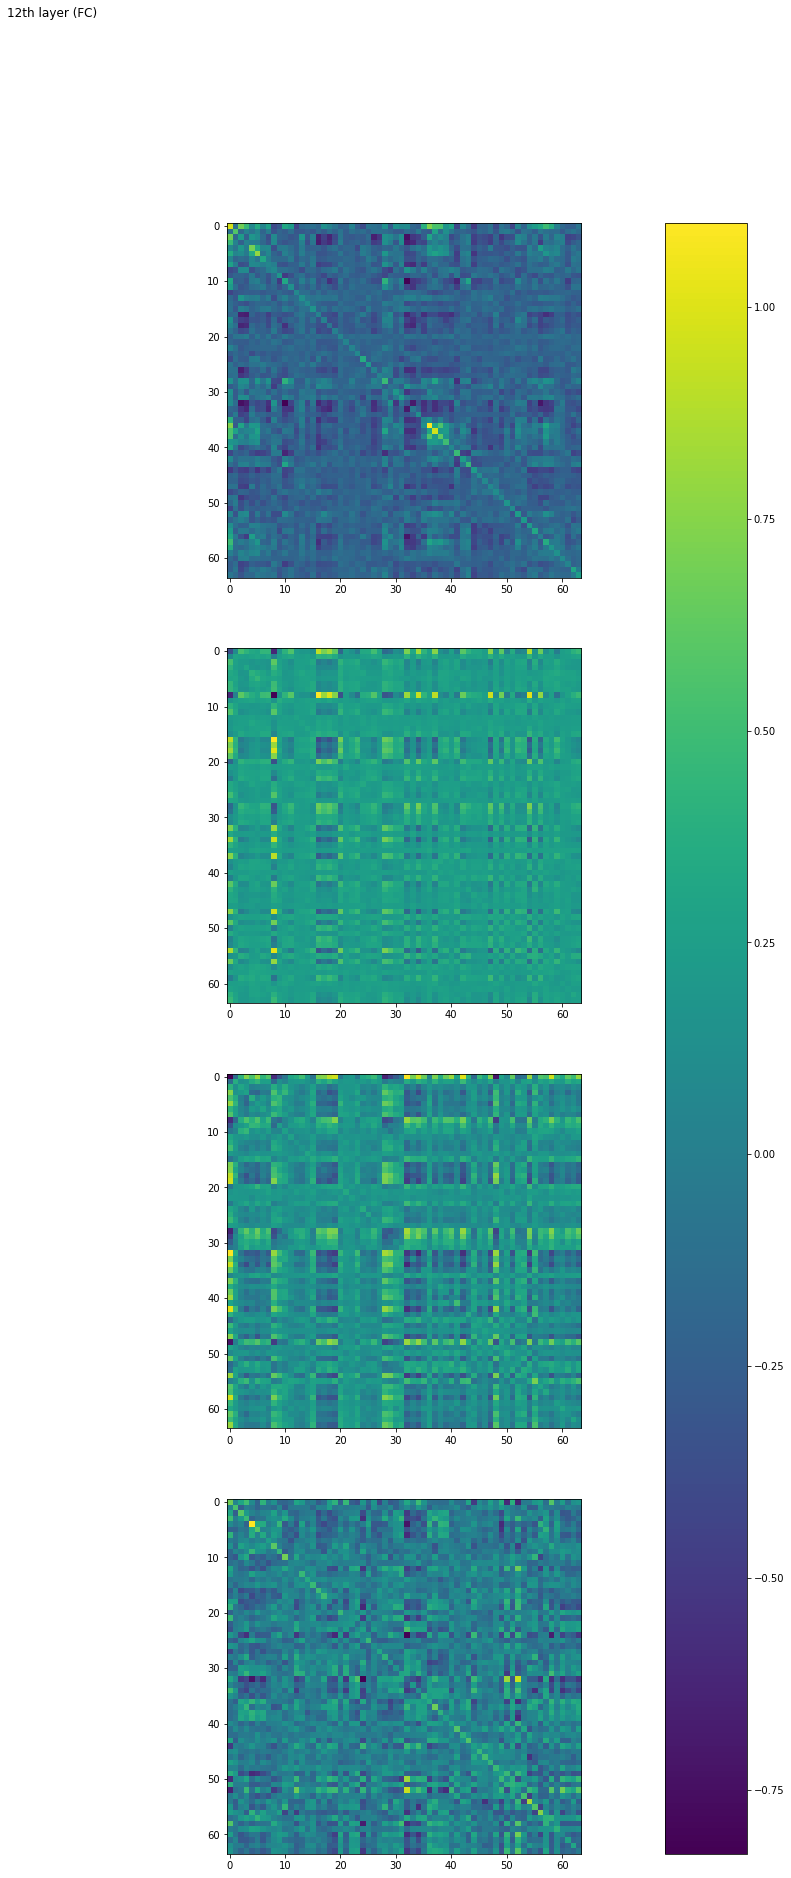

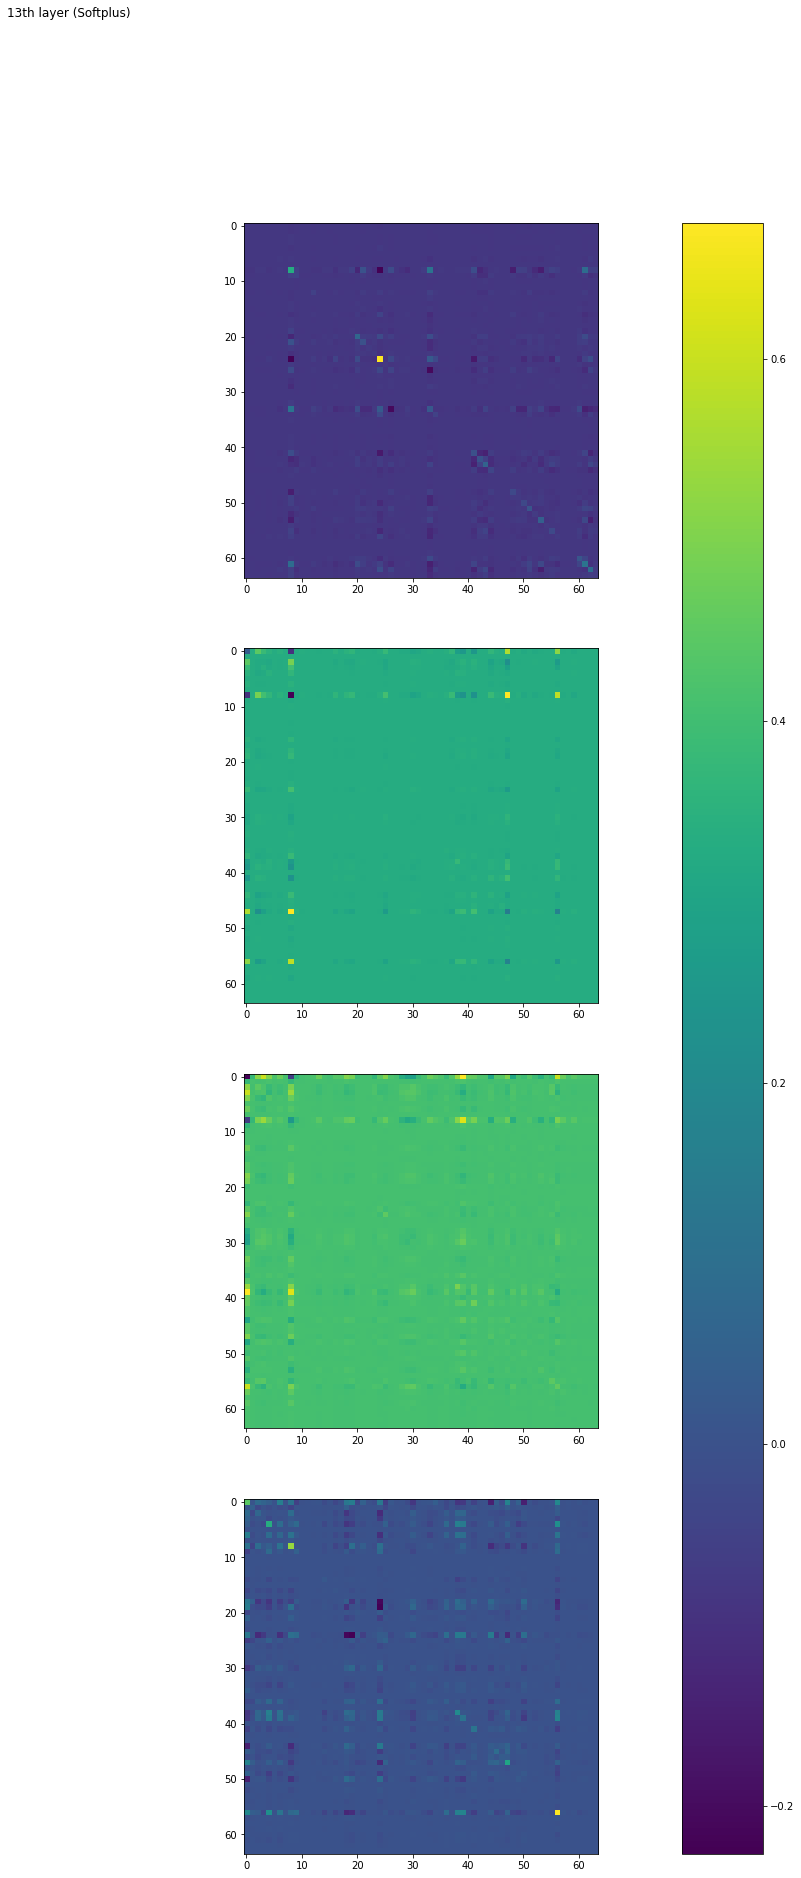

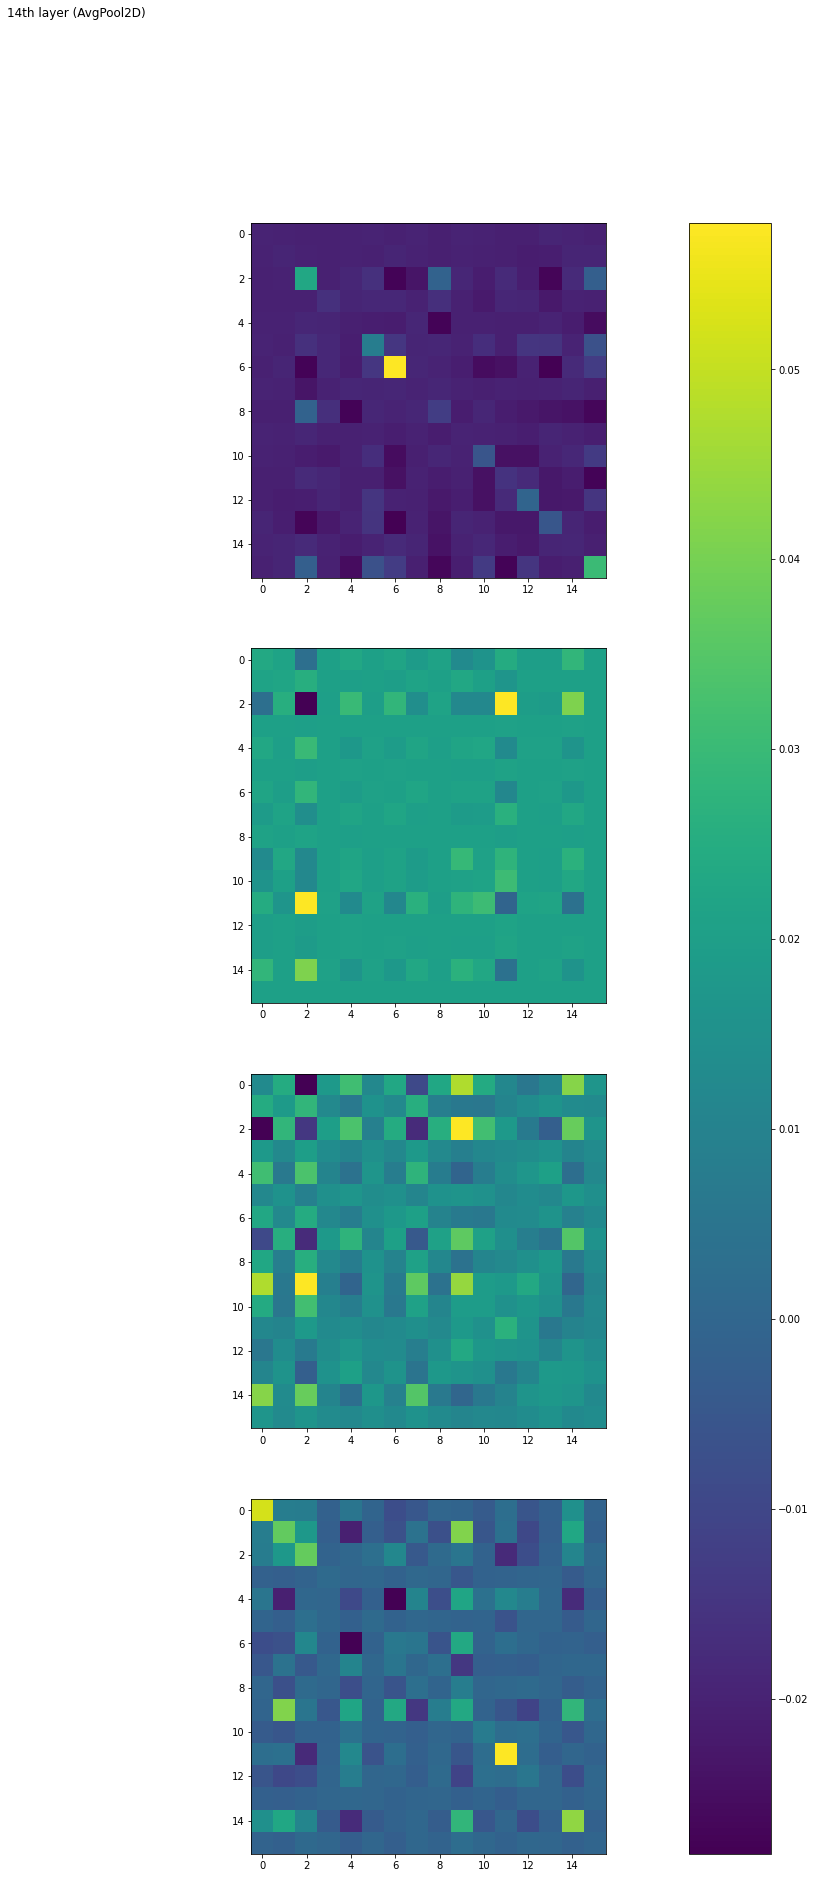

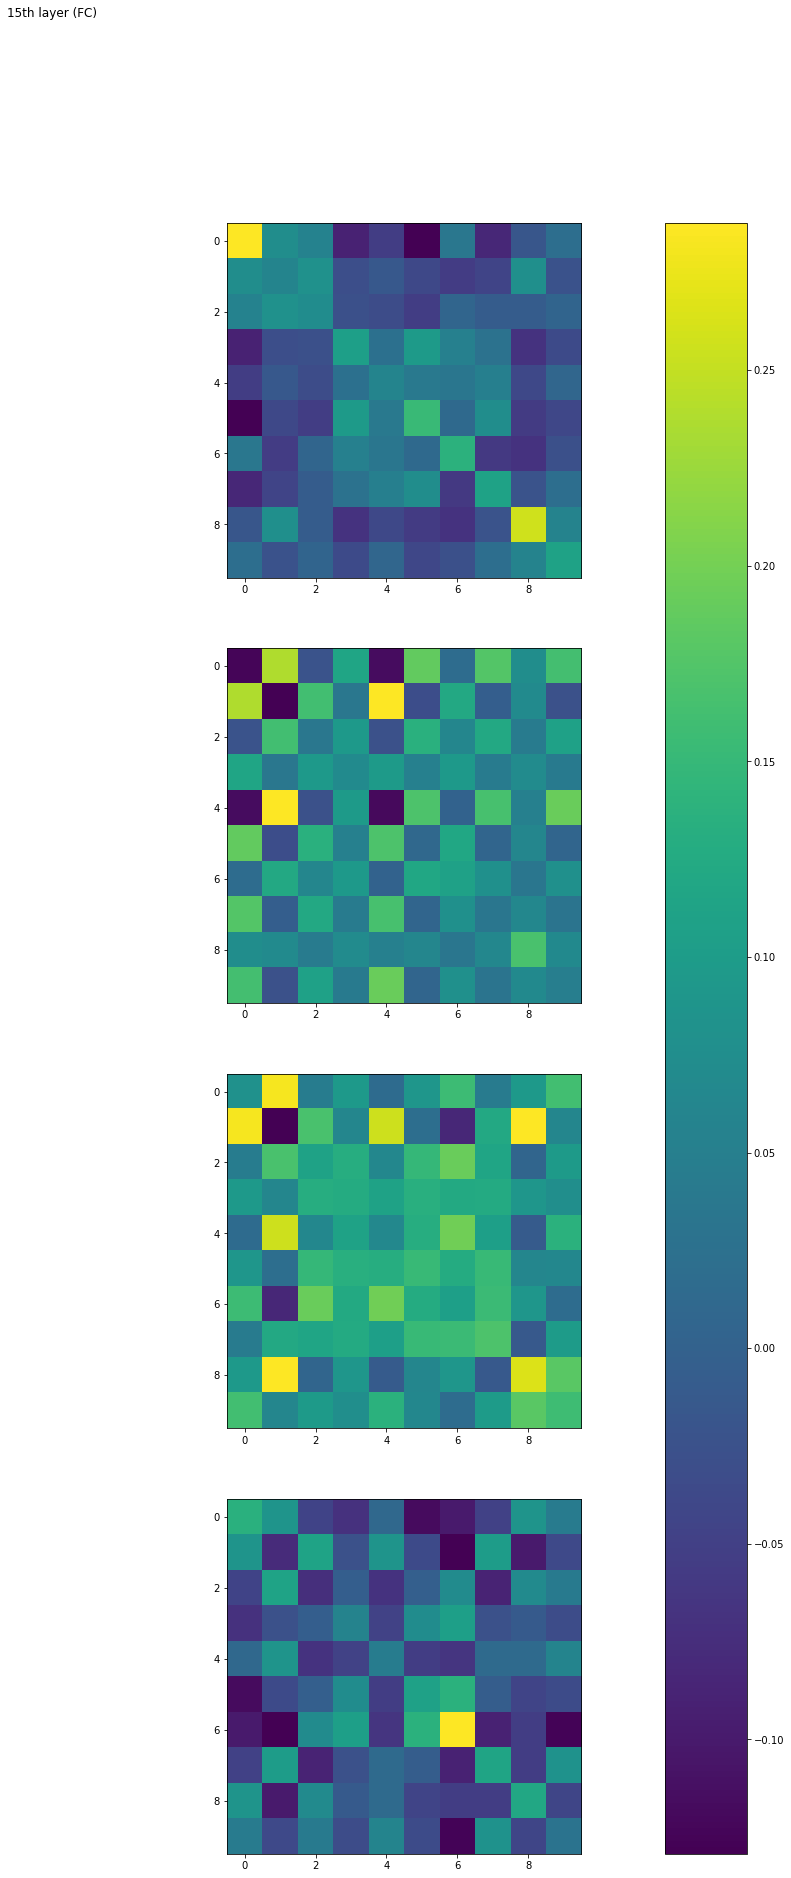

In [2]:
memse.forward(batch_input, False, True)
plt.show()